# Logistic Regression
## This project will focus on investigating and predicting whether a person will click on an ad (artificial data set)


In [1]:
# standard imports/setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
ad_data = pd.read_csv('data/advertising.csv')

In [22]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [4]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Dataset is small only about 1000 entries can also deduce that there are an even amount of users who clicked and did not click on the ad as mean=0.5. This is extreamly uncommon but helpful as it helps to reduce bias in our model. 

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

through feature engineering later we can reduce the unique values of timestamp by looking either at the month or year. making it more valid to use to train our model

## Exploratory Data Analysis


<AxesSubplot:ylabel='Frequency'>

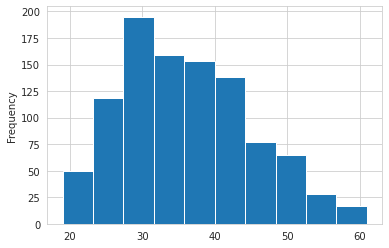

In [12]:
ad_data['Age'].plot.hist(bins=10)

The age distribution largest age bracket is between ~28-31 years old

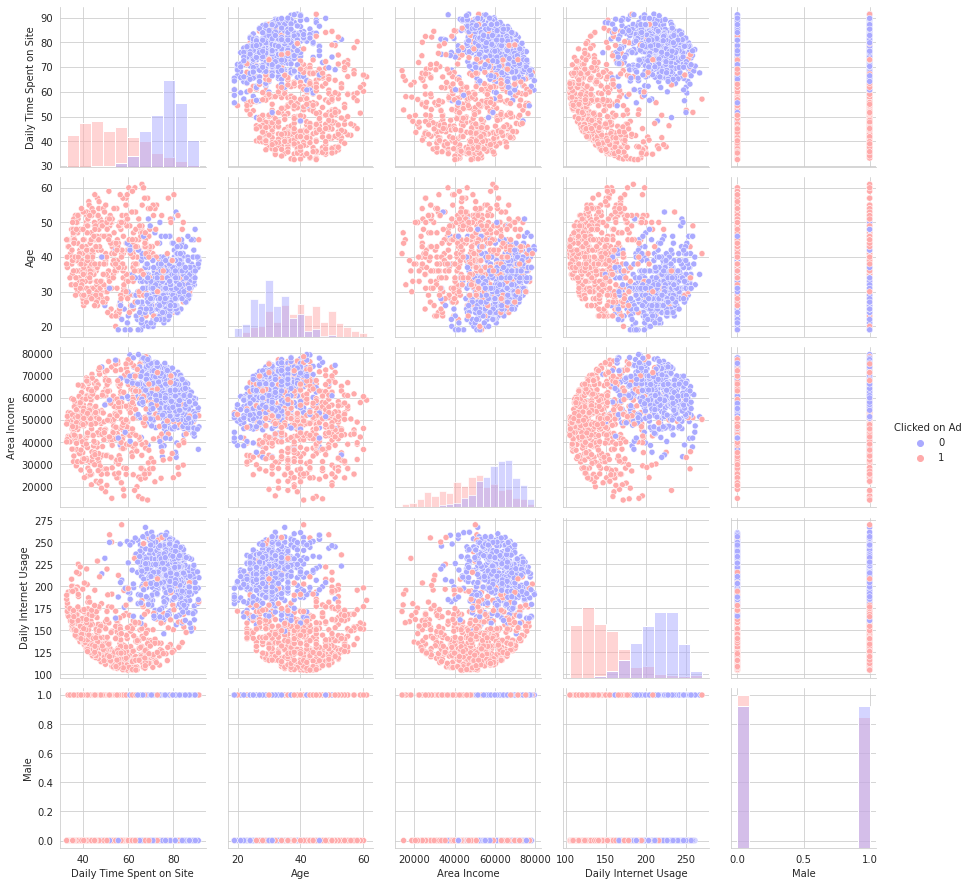

In [10]:
sns.pairplot(data=ad_data, diag_kind='hist',hue='Clicked on Ad',palette='bwr')

## Inferences from visualisation-
* The longer the customer spends on the site the chance they will click on the ad
* the older the customer the higher the chance they will click on the ad
* higher area income customers click on the ad less
* customers who spend more time on the internet daily are less likely to click on the ad
* females are slightly more likely to click on the ad

# Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


##  Feature engineering of timestams to get the month

In [25]:
ad_data['months'] = ad_data['Timestamp'].apply(lambda x:x[5:7])

In [26]:
ad_data['months'].nunique()

7

In [27]:
dummies = pd.get_dummies(ad_data['months'])

In [ ]:
ad_data = ad_data.join(dummies)

In [31]:
ad_data.drop(['City','Country','Timestamp'], axis=1, inplace=True)

In [ ]:
ad_data.drop('Ad Topic Line', axis=1, inplace=True)

In [33]:
X = ad_data.drop('Clicked on Ad', axis=1)
y = ad_data['Clicked on Ad']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression(solver='liblinear')

In [37]:
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

## Predictions and Evaluations

In [39]:
predictions = logmodel.predict(X_test)

## Classifying our predictions

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[140   6]
 [ 23 131]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       146
           1       0.96      0.85      0.90       154

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



## overall we have an okay accuracy of about 90% in our classification
we have about 6 false-positives (type-1 error) and 23 false-negatives (type-2)


# I will now remove the month dummy variables to observe the effect on the model


In [45]:
ad_data.drop(['01','02','03','04','05','06','07'], axis=1, inplace=True)

In [47]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'months'],
      dtype='object')

In [48]:
X = ad_data.drop('Clicked on Ad', axis=1)
y = ad_data['Clicked on Ad']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
logmodel_2 = LogisticRegression(solver='liblinear')

In [ ]:
logmodel_2